Credits: https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7

In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


In [4]:

#^IXIC from yahoo
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2019,9,1)
df = web.DataReader("^IXIC", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-26,7856.040039,7789.049805,7829.580078,7853.740234,1688860000,7853.740234
2019-08-27,7916.830078,7795.180176,7908.779785,7826.950195,1913760000,7826.950195
2019-08-28,7866.870117,7766.669922,7798.350098,7856.879883,1656930000,7856.879883
2019-08-29,7992.290039,7925.830078,7945.779785,7973.390137,1700840000,7973.390137
2019-08-30,8017.910156,7914.740234,8015.160156,7962.879883,1665840000,7962.879883


Download data from https://finance.yahoo.com

Use Scikit learn to try out 3 different types of regression models to predict the price of that stock for a future date.

Visualize your result using matplotlib or another plotting library


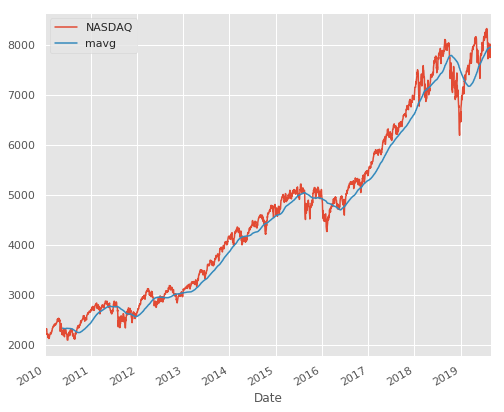

In [5]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='NASDAQ')
mavg.plot(label='mavg')
plt.legend()

In [6]:
df.shape

(2432, 6)

In [7]:
df.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-28,7866.870117,7766.669922,7798.350098,7856.879883,1656930000,7856.879883
2019-08-29,7992.290039,7925.830078,7945.779785,7973.390137,1700840000,7973.390137
2019-08-30,8017.910156,7914.740234,8015.160156,7962.879883,1665840000,7962.879883


In [9]:
dfreg = df.loc[:, ['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High']-df['Low'])/df['Close'] *100
dfreg['PCT_change'] = (df['Close']-df['Open'])/df['Open']*100
dfreg

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2010-01-04,2308.419922,1931380000,0.725171,0.610615
2010-01-05,2308.709961,2367860000,0.784415,0.062409
2010-01-06,2301.090088,2253340000,0.799192,-0.286859
2010-01-07,2300.050049,2270050000,0.699119,0.085287
2010-01-08,2317.169922,2145390000,1.164783,1.087579
2010-01-11,2312.409912,2077890000,1.040908,-0.532098
2010-01-12,2282.310059,2368320000,1.145775,-0.651639
2010-01-13,2307.899902,2318350000,1.685945,0.805428
2010-01-14,2316.739990,2254170000,0.831773,0.583071


In [0]:
import math
dfreg.fillna(value = -9999, inplace=True)

forecast_out = int(math.ceil(0.01*len(dfreg)))

forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)

In [13]:
import numpy as np
from sklearn import preprocessing
X = np.array(dfreg.drop(['label'], 1))
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:

clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [19]:
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [0]:

confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

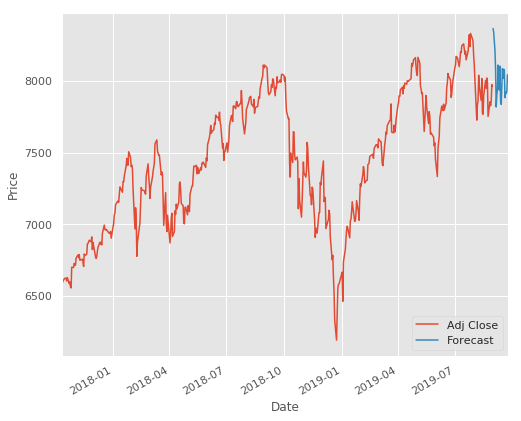

In [21]:

forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

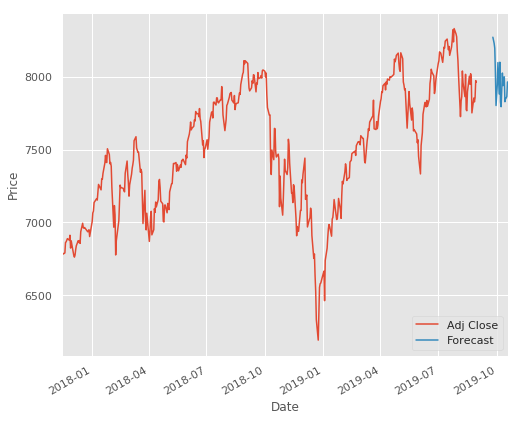

In [22]:
forecast_set = clfpoly2.predict(X_lately)
dfreg['Forecast'] = np.nan
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

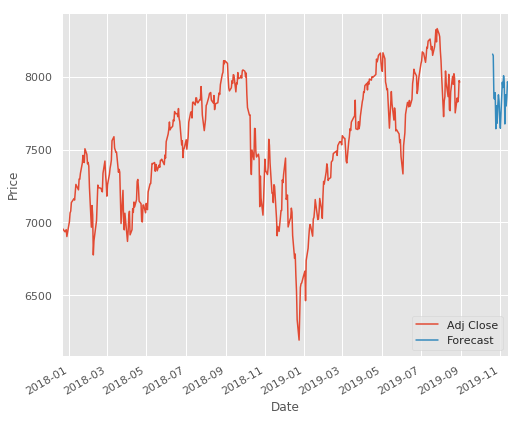

In [23]:
forecast_set = clfpoly3.predict(X_lately)
dfreg['Forecast'] = np.nan
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

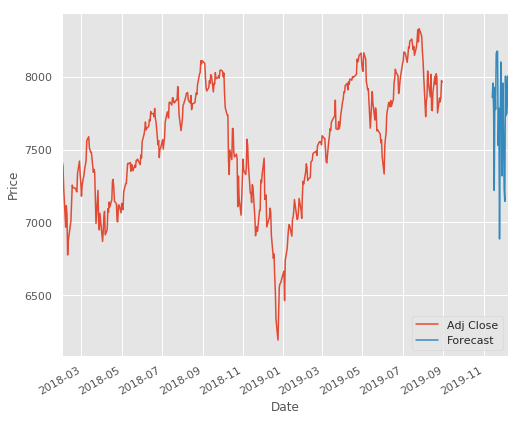

In [24]:
forecast_set = clfknn.predict(X_lately)
dfreg['Forecast'] = np.nan
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()